# Differtless Documentation
### CS 107 Group 33: Teresa Datta, Anastasia Ershova, Mark Penrod, Will Wang

## Introduction 
Differentiation of functions helps find the maxima, minima, and zero points that are essential for optimization and prediction in a variety of problems across a wide range of fields (i.e. Machine Learning, Physics, Fluid Mechanics, and more). Automatic differentiation (AD) is a computational approach that automatically finds the derivatives of a function using a computer program. For a given function, the AD software should be able to compute the derivatives of any order with machine precision. Through the computation of the Jacobian matrix and gradients, we are also able to optimize. 

Automatic differentiation differs from classical methods such as symbolic differentiation and numerical differentiation in that the AD method requires much less computational time and is not affected by numerical instability.


Differtless is a software package for performing AD, with additional functionality for performing optimization to find stationary points of functions. Our goal is to make automatic differentiation effortless!

## Background
Automatic differentiation is based on the decomposition of differentials using chain rule. Separated by the order of chain rule calculation, AD can be divided into two modes: forward mode and reverse mode. The forward mode calculates derivatives from the inner function to the outer function using chain rule repeatedly, while the reverse mode calculates from outside to inside. 
We can also say the forward mode calculates the product of the function's Jacobian matrix $J$ with the seed vectors specified by input variables, while reverse modes computes the product of the transpose of Jacobian matrix $J^T$ with  seed vectors. In a function with $m$ inputs and $n$ functions, represented by $R^m \rightarrow R^n$, forward mode is more efficient when $n$ >> $m$, while reverse mode is more efficient when $n$ << $m$.

For our extension, we implemented optimization functionality for `numpy` and `scipy` mathematical operations, probability distributions, and spatial functions. `numpy` and `scipy` are popular open-source libraries for Python featuring a large collection of high-level numerical computing tools and modules for optimization, linear algebra, integration, interpolation, and special functions for tasks common in science and engineering.
There are many useful applications of AD in this realm: for example, AD is often used within the context of Bayesian parameter inference for sampling from the posterior using methods like Hamiltonian Monte Carlo, where one needs to be able to take the gradients of probability distributions. 

Thus, we implemented the probability and cumulative distribution functions of commonly used statistical distributions such as the Normal, Poisson and Gamma distributions. When performing parameter inference in this manner, users often work with the logarithms of the functions to prevent overflow or underflow errors – thus we also implemented the log PDFs and log CDFs of all these distributions. We note that a lot of this functionality is not available in other AD packages like autograd.

We hope that differtless will be a convenient way for users in a range of disciplines to integrate AD into their already-established workflows, without having to redefine functions they would typically use packages like numpy and scipy for, and without having to modify their pipeline to incorporate optimization routines.

A computational graph is useful in visualizing the propagation of elementary operations that construct the function to be auto-differentiated. From here, it is easy to evaluate the numerical value after each operation, the derivatives of the elementary operations, and numerical values of derivatives with respect to each input variable.

For an example function 

$$
f(x,y)=
\left[
\begin{matrix}
c_1 & c_2
\end{matrix}
\right]
\left[
\begin{matrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{matrix}
\right]
\left[
\begin{matrix}
x  \\
y
\end{matrix}
\right]
$$



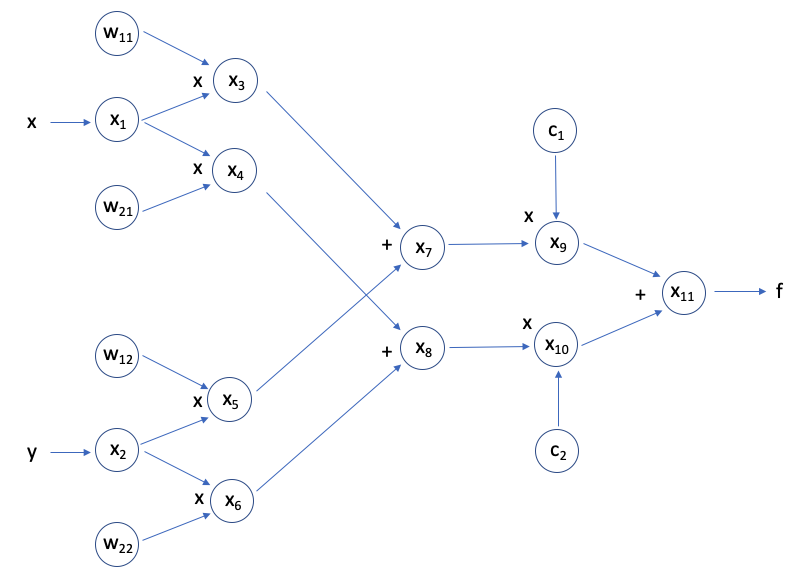

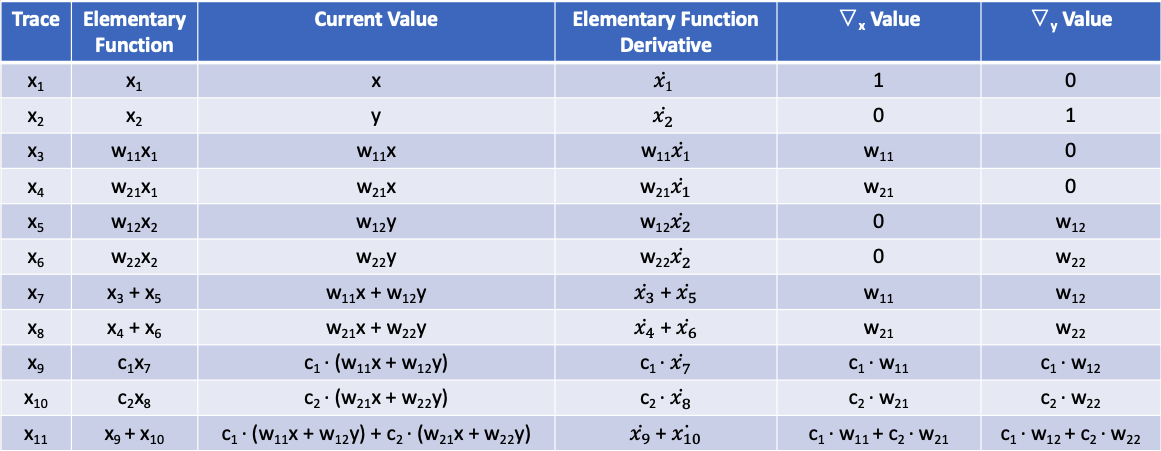

In [1]:
from IPython.display import Image, display
display(Image(filename='img/comp.png', embed=True))
display(Image(filename='img/trace.png', embed=True))

## How to use Differtless

Differtless is available from PyPI via `pip install differtless`

`differtless` can also be obtained by `git clone https://github.com/differtless/cs107-FinalProject.git`

If a user obtained `differtless` from github, they can install the package by running `pip install .`

In both cases, package requirements are provided and checked for via `setup.py` 

    # example github installation
    >> git clone https://github.com/differtless/cs107-FinalProject.git
    >> cd cs107-FinalProject
    >> pip install .
    

Once the user has downloaded differtless they can run `from differtless import ad` and `import differtless.operations as op` in their driver script. Then when they have a function that they would like to automatically differentiate, they will: 

1. Define the function, using either elementary operations (which we have overloaded- add, subtract, etc) or `differtless` operations for elementary functions (e.g. `op.sin`, `op.exp`)
    * The user may also define multiple functions (NOTE: all functions must have the same parameters, regardless of whether they are used in the body of the function)
2. User defines inputs and optional seed
    * Scalar inputs: 
        * Single scalars may be in the form of a number or `list` containing one number
        * Multiple scalars must be input as a `list` or `tuple`
    * Vector inputs:
        * Single and multiple vectors must both be defined as a list of lists or tuple of tuples
        * Ex. `x = [[1,2,3]]`
    * Seed must be in `list` form (or list of lists)
3. User calls the forward function with their pre-defined function (or list of functions), inputs, and seeds.
    * This includes the preprocessing step.
    * NOTE: the seed matrix is optional, if no seed is specified the seed will be the appropriate identity matrix
    * This will return the value and corresponding derivatives.
4. User can also call `ad.minimize`, `ad.root`, or `ad.least_squares` to utilize optimization functionality 
    * users can also call on probability distributions (such as Normal, Poisson, Gaussian)  and the special functions overloaded in the `operations` module


##### Example: 

    from differtless import ad
    import differtless.operations as op

    # Define a function and provide inputs/seeds

    def f1(x, y, z):
        return x*y + op.exp(z)

    def f2(x, y , z):
        return (op.exp(x/y) + z)/y

    # scalar inputs
    inputs = [1,2,3]
    seeds = [[42, 1, 1], [2, 42, 2], [3, 3, 42]]

    # vector inputs
    inputs = [[3, 2, 1], [4, 5, 6]]
    seeds = [[1, 0], [0, 1]]

    # Run automatic differentiation
    f1_ad = ad.forward(f1, inputs, seeds)

    # Run AD with vector-valued function
    f1_f2_ad = ad.forward([f1, f2], inputs, seeds)

    # minimizing solution
    min_sol = ad.minimize(f1, [2, 3, 4])

    print(f'Function value: {f1_ad.value}')
    print(f'Function derivatives: {f1_ad.gradients}')
    print(f'Function Jacobian: {ad.Jacobian(f1, inputs)}')
    print(f'Optimization minima solution: {min_sol}')



#### Full Functionality Demo: also available as demo.ipynb


In [1]:
### import differtless ###
from differtless import ad
import differtless.operations as op

### define inputs of interest ###
# scalar input
single_scalar = [5]
# multiple scalar inputs (include seed)
multi_scalar = [2,3,4]
# vector input
single_vector = [[4,5,6]]
# multiple vector inputs
multi_vector = [[1,2,3],[4,5,6],[7,8,9]]
# seed matrix for multivariable functions
multi_seed = [[42,1,1],[2,42,1],[3,3,42]]

### define functions of interest ###
# single-variable functions
def single_f1(x):
    return op.exp(op.sin(x) ** 2)
def single_f2(x):
    return op.log(2 / x) - x
# multivariable functions
def multi_f1(x, y, z):
    return (z ** (x - op.tanh(x + y)))/x
def multi_f2(x, y, z):
    return x ** (10 - y)

In [ ]:
### Preprocessing example ###
ad.preprocess(multi_vector)

In [ ]:
### Scalar-Valued Functions ###
# Scalar input, single variable
forward1 = ad.forward(single_f1, single_scalar)
jacobian1 = ad.Jacobian(single_f1, single_scalar)
print(f'Value = {forward1.value}\nGradient = {forward1.gradients}\nJacobian = {jacobian1}')

# Vector input, single variable
forward2 = ad.forward(single_f1, single_vector)
jacobian2 = ad.Jacobian(single_f1, single_vector)
print(f'Value = {forward2.value}\nGradient = {forward2.gradients}\nJacobian = {jacobian2}')

# Scalar input, multivariable
forward3 = ad.forward(multi_f1, multi_scalar, multi_seed)
jacobian3 = ad.Jacobian(multi_f1, multi_scalar)
print(f'Value = {forward3.value}\nGradient = {forward3.gradients}\nJacobian = {jacobian3}')

# Vector input, multivariable
forward4 = ad.forward(multi_f1, multi_vector)
jacobian4 = ad.Jacobian(multi_f1, multi_vector)
print(f'Value = {forward4.value}\nGradient =\n{forward4.gradients}\nJacobian =\n{jacobian4}')

In [ ]:
### Vector-Valued Functions ###
# Scalar input, single variable
forward5 = ad.forward([single_f1, single_f2], single_scalar)
jacobian5 = ad.Jacobian([single_f1, single_f2], single_scalar)
print(f'Value = {forward5.value}\nGradient = {forward5.gradients}\nJacobian = {jacobian5}')

# Scalar input, multivariable
forward6 = ad.forward([multi_f1, multi_f2], multi_scalar, multi_seed)
jacobian6 = ad.Jacobian([multi_f1, multi_f2], multi_scalar)
print(f'Value = {forward6.value}\nGradient =\n{forward6.gradients}\nJacobian =\n{jacobian6}')

# Vector input, single variable
forward7 = ad.forward(multi_f1, multi_vector, multi_seed)
jacobian7 = ad.Jacobian(multi_f1, multi_vector)
print(f'Value = {forward7.value}\nGradient =\n{forward7.gradients}\nJacobian =\n{jacobian7}')

In [ ]:
### Extra Feature- Optimization ###

# Function optimization
ad.minimize(multi_f2, [2, 3, 4])

# Least-squares solution with bounds on the variables
ad.least_squares(single_f1, 4, bounds=(-4, 10))

# Root Finding
ad.root(single_f2, 1)

In [2]:
### Extra Feature - Probability Distributions ###

# Log CDF of Normal distribution
forward8 = ad.forward(op.Normal(loc=3, scale=2).logcdf, single_vector)
jacobian8 = ad.Jacobian(op.Normal(loc=3, scale=2).logcdf, single_vector)
print(f'Value = {forward8.value}\nGradient =\n{forward8.gradients}\nJacobian =\n{jacobian8}')

# Joint PDF of multiple variables described by different probability distributions
def joint_probabilities(x, y, z):
    return op.Normal(loc=1, scale=1).pdf(x) * op.Gamma(alpha=1, beta=2).pdf(y) * op.Poisson(mu=3).pmf(z)
forward9 = ad.forward(joint_probabilities, multi_vector, multi_seed)
print(f'Value = {forward9.value}\nGradient =\n{forward9.gradients}')

# Special Functions
def special(x):
    return 2*op.gamma(x) - op.erf(x/3)
forward10 = ad.forward(special, single_vector)
print(f'Value = {forward10.value}\nGradient =\n{forward10.gradients}')

## Software Organization

Directory Structure:

differtless/
* README.md
* setup.py
* .gitignore
* .travis.yml
* codecov.yml
* requirements.txt
* docs/
    * documentation.ipynb *(this document)*
    * demo.ipynb
    * milestone1.ipynb
    * milestone2_progress.md
    * milestone2.ipynb
* tests/
    * tests.py
* differtless/
    * \__init__.py
    * operations.py
    * ad.py

Functionality: 
* Documentation provides detailed desciption of our system via documents such as this one which you are reading. Our documentation also includes docstring style documentation in .py files and an interactive short tutorials in the form of a `demo.ipynb` jupyter notebooks.
* Tests provides for a comprehensive set of testing programs implemented via PyTest, and is where our Test Suite will live!
* Operations includes basic operations (addition, subtraction, power, etc), comparison operators, elementary functions, and numpy and scipy operators and probability distributions adapted for our `FuncInput` datatype to yield their evaluation and derivative.
* `ad.py` implements the forward mode of automatic differentiation: preprocessing of user inputs, execution, and extra optimization functionality (`scipy` required for optimization)

Testing: 
The test suite will live in `tests/` and uses `pytest`. We utilize Travis CI as a continuous integration mechanism to ensure our project is constantly building and passing. We also use CodeCov to ensure our testing suite is testing all parts and branches of the code. 

We distribute our package via pip (PyPi).

## Implementation


### Dependencies

`numpy` for elementary functions, `scipy` for optimization and other functions

### Core Data Structures and Classes

Our implementation, through our created class `FuncInput` takes advantage of NumPy's `array` for storing FuncInput value and derivative information. NumPy arrays have the advantage of mutability and simple execution of pair-wise vector operations.

### Handling Vector-Valued Functions

For vector-valued functions, the user will define each of the desired functions then pass them in as a list into the `forward` or `Jacobian` functions. 

### `operations` module

Here we define elementary functions for which we cannot use operator overloading to return their evaluation and derivative (requires `numpy` as a dependency).
* We also implemented a wide selection of `numpy` and `scipy` optimization, spacial and mathematical methods as described above and in the Additional Features section

### `ad` module

* `preprocess` function
    * Allows us to deal with scalars and vectors
    * Takes in a `list`  of `inputs` (1 x N) (where each input can be a scalar, or a tuple or list- for handling vector values) and an optional matrix `seeds` (N x N)
    * If the user inputs a scalar it will be converted to a 1 x 1 vector
    * `seeds` defaults to None, in which case we will use an N x N identity matrix where `N = len(inputs)`
    * For each value in `inputs` and row in `seeds` we will instantiate the `FuncInput` object described below
* `FuncInput` class
    * Parameters: `input` (value - `np.array`) and `seed` (seed vector – `np.array`) 
    * The class has two instance variables: `self.val_ = value` (value) and `self.ders_ = seed` (list of derivative values)
        * Two getter methods (`value` and `gradients`) are implemented with the `@property` decorator to allow indirect access to the instance variables
    * In this class we use dunder methods for operator overloading of elementary operations (e.g. `__add__`, `__sub__`, `__mul__`, `__truediv__`, `__pow__`) to return evaluation and derivative
    * In our `operations` module we implement other elementary operations (e.g. sin, exp)
    * In both cases the methods return a new instance of `FuncInput` with the `evaluation` and `[evaluation of derivatives]` as inputs
* `forward` function
    * Parameters: `func` (user-defined function(s)), `inputs`, `seeds`
    * Executes `preprocess` function on `inputs` and `seeds` to convert to FuncInput objects
    * Executes forward mode of automatic differentiation
    * Returns evaluation and derivative calculation
* `Jacobian` function
    * Parameters: `func` (user-defined function(s)), `inputs`
    * Executes `forward` function on each function, `func`, and `inputs` using the default `seed` (`[]` which will produce an indentity matrix)
    * Returns the gradient of the result, which is the Jacobian
* `minimize` function
    * scipy.optimize.minimize wrapper
    * Parameters: `fun` (user-defined function), `x0` (ndarray, shape (n, ): initial guess), `discriptive`= False (whether to return full scipy `OptimizeResult`),`scipy.optimize.minimize *args`
    * Makes `fun` compatible with scipy and uses differtless to calculate Jacobian, then performs optimization using `scipy.optimize.minimize`
    * Returns solution array or `OptimizeResult` scipy object


## Additional Features

Given that a large application space for AD is optimization, we built upon the utility of numpy and scipy and implemented two main features for our extension:

1.  Wrappers for scipy’s optimization routines (such as scipy.optimize.minimize, root, and least_squares)
    - These automatically feed in jacobians calculated by differtless into the optimizer, and the user can simply input their multi-argument functions as is into our functions, without having to convert them to a scipy-compatible format (in which the function can only take a single argument that is a list of the parameters).
    - `minimize`: scipy.optimize.minimize wrapper
        - Parameters: `fun` (user-defined function), `x0` (ndarray, shape (n, ): initial guess), `discriptive = False` (whether to return full scipy `OptimizeResult`),`scipy.optimize.minimize *args`
        - Makes `fun` compatible with scipy and uses differtless to calculate Jacobian, then performs optimization using `scipy.optimize.minimize`
        - Returns solution array or `OptimizeResult` scipy object


2.  Implementations for scipy functions, special functions, spatial functions, statistical distributions, and a majority of the numpy library mathematical operations
    - With this practicality, the user does not need to redefine their functions to compute the gradient.
    - We particularly focused on common use-cases for AD and functions that are not available in other AD packages. 
    - This includes probability distributions such as Poisson, Gamma, and Normal distributions and their log PDFs and log CDFs. 
        - These distributions were implemented as classes, so users can create instances of these distributions, setting the appropriate parameters for each distribution (i.e. Normal` object with mean and standard deviation), and then utilize the pdf/ logpdf/ cdf/ logcdf class methods
    - This also includes special functions (error function, gamma function, factorial, floor, and lower incomplete gamma function)
    - We also implemented spatial functions like Euclidean distance that are also not available in other AD packages
    - If users wants to implement their own operations, they can use the `validate_input` wrapper to ensure compatibility for single-input functions and `validate_input_multiple` for functions that take additional arguments 




## Inclusion Statement 
Differtless is committed to developing a culture of inclusion. Only by learning from a diverse community of contributors are we able to build the best product and grow to be our best selves. We welcome all educational levels, cultures, ethnicities, races, gender identities and expressions, nations of origin, ages, languages spoken, veteran’s status, colors, religions, disabilities, geographic backgrounds, sexual orientations and beliefs.

*We embrace your unique background, because you belong here.*

## Broader Impact and Inclusivity Statement

One of the key applications of automatic differentiation is for optimization, and we specifically explored the implementations and utility of minimization via scipy.optimize.minimize. Although the technical details for how the minima of these functions may feel far removed from any potential negative intent, it is vital to remove our rose-colored glasses and remember that technology is never created in a void. 

Imagine, for example a machine learning algorithm for which we have determined a loss function- the most obvious way to get the best model would then be to minimize the loss function, potentially via our AD package. That's in large part because as computer scientists, our understandings of what makes a model the "best" focus accuracy metrics as optimized via a loss function. However, for models with real-world impact, they need to be both **accurate and fair**. These are two separate objectives with different metrics of success- accuracy may be measured by our loss function, but fairness requires a deeper dive:  understanding the pre-existing biases in our dataset, comparing the accuracy/false positive/false negative rates between any protected groups. 
When accuracy is too heavily optimized, the real-world impacts can be grave. The effects of algorithmic bias have caused it to be harder for certain minority groups to be hired under the same qualifications (2), and in the contexts of facial recognition systems, at the expense of ethical introspection, these algorithms are known to have lower accuracy on people of color and have caused the unnecessary and traumatic arrests of innocent men of color in the U.S. (4) and the tracking and controlling of the Uighur minority group in China (1).

However, there are still strong motivations for pursuing this type of work and potential positive impacts. Recently, in academic fields such as flow topology (5) and aerodynamic design frameworks (6), automatic differentiation have been used to advance the understanding of necessary and previouisly less understood problems.

Marginalized groups are still severely underrepresented in tech, and this disparity is even more apparent in the open source community. 
For example, a Toptal study (7) found that in their random sample, just 5.4% of GitHub users with >10 contributions are female.
To this end, we've attempted to address this subtle barriers in order to make our repo as welcoming and inclusive as possible. The first step we took to make clear that all backgrounds belong here in our contributing community was to develop an Inclusion Statement to reflect our commitment to fostering a welcoming community. This is one of the first things that users will see in our repo. 

For our software project, our code contribution is as transparent as possible. Pull requests can be approved and reviewed by any member of our team, and if there is any concern about a PR being approved, a group discussion is initiated to ensure proper vetting and open communication is maintained. 
It is also worth mentioning that our (randomly assigned) team brings a diverse array of perspectives- both from an internal diversity viewpoint (gender, ethnicity, age, etc.) but also from an academic background viewpoint. We represent a variety of fields and a range of programs under the Harvard umbrella.
This is important to note since as Anna-Chiara suggests in the Toptal study, projects that show diversity in their leadership promote a culture of inclusivity within its contributors. 
We recognize, however, that there are still barriers to certain groups that we have not yet accounted for. One of these is how non-native English speakers will interact with our code. Our entire documentation and examples are written in English, and so if given more time, we would want to make sure there is access to accurately translated versions of our documentation (or at least that it is Google Translate friendly).



1. https://www.nytimes.com/2019/04/14/technology/china-surveillance-artificial-intelligence-racial-profiling.html
2. https://www.vox.com/recode/2020/1/1/21043000/artificial-intelligence-job-applications-illinios-video-interivew-act
3. https://www.theverge.com/2019/11/11/20958953/apple-credit-card-gender-discrimination-algorithms-black-box-investigation
4. https://www.nytimes.com/2020/06/24/technology/facial-recognition-arrest.html
5. https://link.springer.com/article/10.1007/s00158-017-1708-2
6. https://www.ercoftac.org/downloads/bulletin-docs/ercoftac_bulletin_102.pdf 
7. https://www.toptal.com/open-source/is-open-source-open-to-women 

## Future Work

As a future direction for this work, there a few key areas we would like to expand on. 

One logical next step would be to implement reverse mode. Unlike forward mode which is calculate from the inside out, reverse mode calculates from the outside in and would compute the transpose of the Jacobian matrix. We would also like to expand our suite of vailable functionality to cover an even wider range of statistical distributions such as Multivariate Normal, Laplace, and more. 

In continuing with our goal of making automatic differentiation effortless, we could also craft an educational tool by using our implementation and crafting a user-friendly interface to help the public better understand the utility and inner workings of AD. We also could extend our optimization functionality by implementing other schemes that use Jacobians for optimization such as root finding for vector functions. Finally, we could help remove barriers for non-native english speaking contributors by ensuring there is access to accurately translated or Google Translate friendly versions of our documentation. 

We thoroughly enjoyed making Automatic Differentiation effortless, and we hope you enjoyed learning about our project! Thank you!
